<a href="https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/principal_component_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
cancer = datasets.load_breast_cancer()


In [0]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
#checking if 0 represents malignant or benign

# we already know that there are 357 benign values. we count the count of data points that are classified as 1 and cross check with the information we already have
len(cancer.data[cancer.target == 1])


357

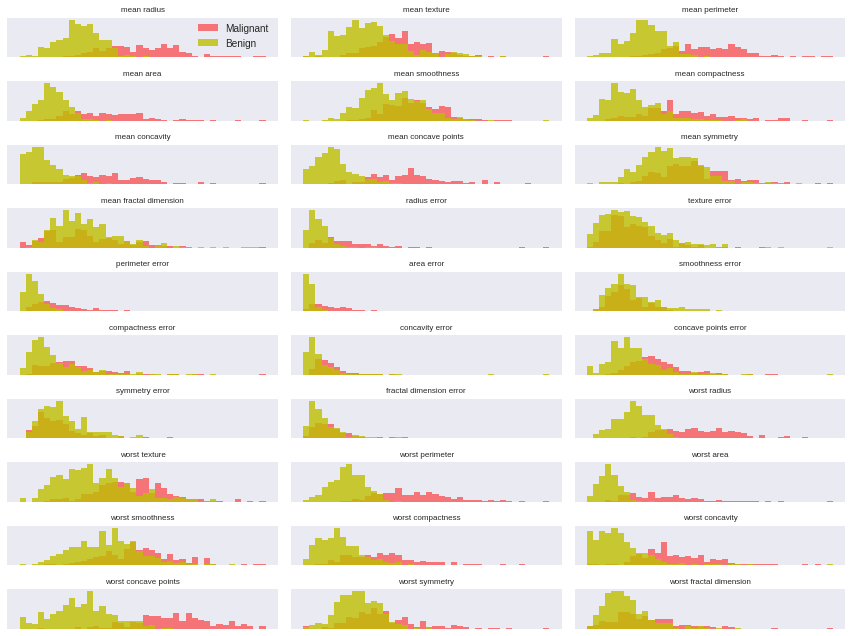

In [0]:
# How features affect the target

fig, axes = plt.subplots(10,3, figsize = (12,9))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins = 40)
  ax[i].hist(malignant[:,i], bins = bins, color = 'r', alpha = 0.5)
  ax[i].hist(benign[:,i], bins = bins, color = 'y', alpha = 0.8)
  ax[i].set_title(cancer.feature_names[i], fontsize = 8 )
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
  
ax[0].legend(['Malignant', 'Benign'], loc = "best")
plt.tight_layout()
plt.show()

In [0]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


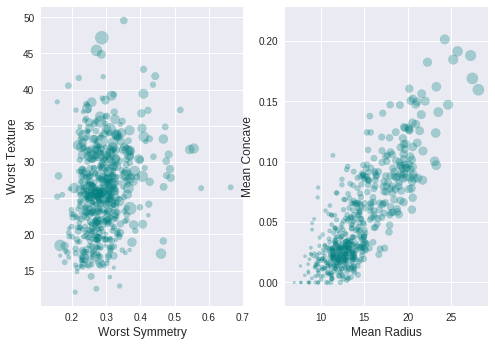

In [0]:
plt.subplot(1,2,1)
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s = cancer_df['worst area']*0.05,color = 'teal', label = 'check', alpha = 0.3)
plt.xlabel('Worst Symmetry', fontsize = 12)
plt.ylabel('Worst Texture', fontsize = 12)
plt.subplot(1,2,2)
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s = cancer_df['mean area']*0.05,color = 'teal', label = 'check', alpha = 0.3)
plt.xlabel('Mean Radius', fontsize = 12)
plt.ylabel('Mean Concave', fontsize = 12)
plt.subplot(1,2,2)

In [0]:
# we need to scale the data before the fitting algorithm is implemented.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
scaled_x = scaler.transform(cancer.data)
scaled_x.max(axis=0)

array([ 3.97128765,  4.65188898,  3.97612984,  5.25052883,  4.77091122,
        4.56842498,  4.24358882,  3.92792966,  4.48475086,  4.91091929,
        8.90690934,  6.65527935,  9.46198577, 11.04184226,  8.02999927,
        6.14348219, 12.0726804 ,  6.64960079,  7.07191706,  9.85159257,
        4.09418939,  3.88590505,  4.28733746,  5.9301724 ,  3.95537411,
        5.11287727,  4.7006688 ,  2.68587702,  6.04604135,  6.84685604])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(scaled_x)
x_pca = pca.transform(scaled_x)

In [0]:
x_pca.shape

(569, 3)

In [0]:
variance_test =  np.var(x_pca, axis =0)
variance_ratio = variance_test/np.sum(variance_test)
print(variance_ratio)

[0.60950217 0.2611802  0.12931763]


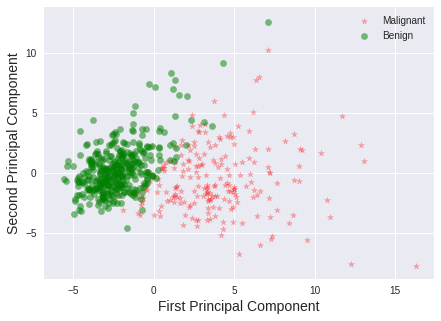

In [0]:
Xax=x_pca[:,0]
Yax=x_pca[:,1]
labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


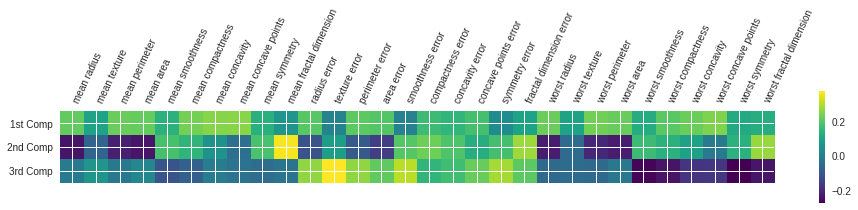

In [0]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

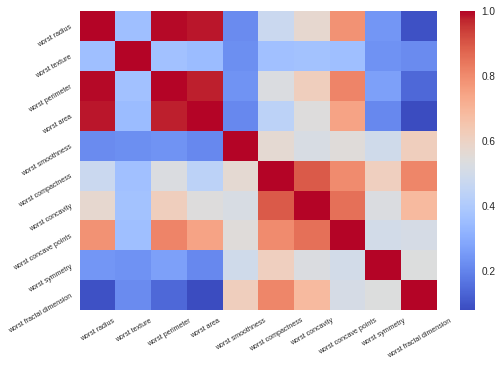

In [0]:
feature_worst=list(cancer_df.columns[20:31]) # select the 'worst' features
import seaborn as sns
s=sns.heatmap(cancer_df[feature_worst].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()
